In [1]:
from himalaya.ridge import Ridge, RidgeCV
import numpy as np
from compare_variance_residual.fmri.features import load_feature
from himalaya.scoring import r2_score, correlation_score

In [2]:
ridge_model = RidgeCV(alphas=np.logspace(-5, 15, 21), cv=5, solver_params=dict(n_alphas_batch=1))
ols_model = Ridge(alpha=1)

In [4]:
semantic, _ = load_feature("../../data", "english1000")
letters, _ = load_feature("../../data", "letters")
moten, n_samples_train = load_feature("../../data", "moten")

In [5]:
ridge_model.fit(letters[:n_samples_train], semantic[:n_samples_train]), ols_model.fit(letters[:n_samples_train], semantic[:n_samples_train])
letters_ridge_prediction, letters_ols_prediction = ridge_model.predict(letters[n_samples_train:]), ols_model.predict(letters[n_samples_train:])

In [6]:
ridge_model.fit(moten[:n_samples_train], semantic[:n_samples_train]), ols_model.fit(moten[:n_samples_train], semantic[:n_samples_train])
moten_ridge_prediction, moten_ols_prediction = ridge_model.predict(moten[n_samples_train:]), ols_model.predict(moten[n_samples_train:])

/home/leo/PycharmProjects/compare_variance_residual/venv/lib/python3.12/site-packages/himalaya/ridge/_random_search.py:491: UserWarning: Solving ridge is slower than solving kernel ridge when n_samples < n_features (here 3737 < 6555). Using a linear kernel in himalaya.kernel_ridge.KernelRidgeCV or himalaya.kernel_ridge.solve_kernel_ridge_cv_eigenvalues would be faster. Use warn=False to silence this warning.
  warnings.warn(
/home/leo/PycharmProjects/compare_variance_residual/venv/lib/python3.12/site-packages/himalaya/ridge/_solvers.py:59: UserWarning: Solving ridge is slower than solving kernel ridge when n_samples < n_features (here 3737 < 6555). Using a linear kernel in himalaya.kernel_ridge.KernelRidge or himalaya.kernel_ridge.solve_kernel_ridge_eigenvalues would be faster. Use warn=False to silence this warning.
  warnings.warn(


In [7]:
letters_ols_corr = correlation_score(letters_ols_prediction, semantic[n_samples_train:])
letters_ridge_corr = correlation_score(letters_ridge_prediction, semantic[n_samples_train:])
moten_ols_corr = correlation_score(moten_ols_prediction, semantic[n_samples_train:])
moten_ridge_corr = correlation_score(moten_ridge_prediction, semantic[n_samples_train:])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import simplstyles

In [11]:
plt.style.use('nord-light-talk')

Text(0, 0.5, '$r$')

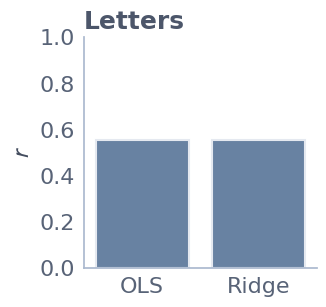

In [18]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=["OLS", "Ridge"], y=[letters_ols_corr.mean(), letters_ridge_corr.mean()])
plt.title("Letters")
plt.ylim(0,1)
plt.ylabel(r"$r$")

Text(0, 0.5, '$r$')

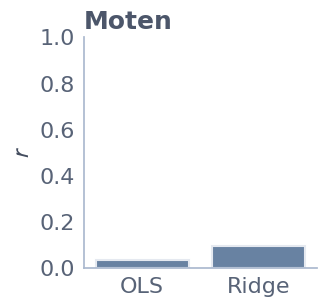

In [20]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=["OLS", "Ridge"], y=[moten_ols_corr.mean(), moten_ridge_corr.mean()])
plt.title("Moten")
plt.ylim(0,1)
plt.ylabel(r"$r$")